# 网易云音乐数据分析

## 1.背景

### 1.1背景与目标

今年四月底，各大网友“册封”华语乐坛“新四大天王”。这四位分别是华晨宇，王琳凯，Capper和姜云升。值得注意的是，这一次“新四大天王”的评选是具有一定审丑性质的。以本文即将分析的Capper的作品《雪distance》和姜云升的作品《真没睡》为例，这两首歌曲都具有歌词质量低、审美价值低的特点，却在近期爆火。我认为这些作品的爆火，与歌手在场下的“迷惑言论”和近期对于这些歌手或者这些作品的负面爆料有关，并且我拟用自己获取的数据证明这一点。

网易云音乐是一款火爆的听歌软件，聚集了大量年轻受众。值得一提的是，相比于QQ音乐等一流听歌软件，网易云音乐的评论数往往是前者的好几倍，我认为这其中的原因是微妙而复杂的。作为一位“村龄”五年的网易云音乐深度用户，我认为网易云爆火原因之一就是它善于营造“氛围”。如今的年轻人物质丰富但也面临着前所未有的压力。情感的压抑，生活的不顺让他们诉诸歌曲，寻求慰藉。而网易云音乐创造的“云村”，“抱一抱”等小功能，还有简约不简单的页面设计，小众但精华的曲库，精准的每日推送以及走心的听歌报告给了年轻人最好的答案。而我此次作业的目标，就是结合时事分析华语乐坛“新四大天王”爆火的原因并且给出自己的评价，再通过自己收集的数据，分析网易云音乐这一软件的一些特点。

### 1.2数据来源

运用python，调用网易云音乐评论的API，整理数据得到Excel文件。部分数据来源于课程群。

## 2.获取数据

参见`pre-processing.ipynb`这是调用API后再用自己编写的函数整合复杂的嵌套`json`文件得到的结果，代码是经过高度简化的，原理上利用我的这些代码可以获取网易云音乐任何一首歌曲的所有评论。
另外一部分是课程群里的数据，在data文件夹中。

## 3.数据读取与分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Line

In [2]:
xue_distance = pd. read_csv("xue_distance_new.csv", low_memory=False, encoding='utf-8')
xue_distance.head()

,Unnamed: 0,Unnamed: 0.1,user.userId,commentId,user.nickname,content,timeStr,likedCount,ipLocation.location,time
0,0,0,121155230,5.903777e+09,奄忽若飘尘_,要黑胶的私我 免费七天,2023/5/9,0.0,福建,1.683600e+12
1,1,1,1521749832,5.903773e+09,X-难忘缘,cpdd,2023/5/9,0.0,河南,1.683600e+12
2,2,2,274740275,5.903777e+09,ahhSherry,桥牌的谎言是什么意思,2023/5/9,1.0,江苏,1.683600e+12
3,3,3,4004418265,5.903773e+09,_-雾川-_,“你永远不知道 我假装不在乎的样子有多难受”,2023/5/9,1.0,广东,1.683600e+12
4,4,4,560208846,5.903775e+09,苏苒卿,在这么冷的天\n?想抽根电子?烟\n可瑞克没有电\n可是雪豹已失联\n摘不下我虚伪的假面\n...,2023/5/9,7.0,江苏,1.683600e+12


In [3]:
zms = pd. read_csv("zms_new.csv", low_memory=False)
zms.head()

,Unnamed: 0,user.userId,commentId,user.nickname,content,timeStr,likedCount,ipLocation.location,time
0,0,286640087,5.903699e+09,yzbbby,怎么写出这个歌的 有种脑干缺失的美,2023/5/9,6.0,重庆,1.683570e+12
1,1,1393536394,5.903580e+09,鸭脖怒锤键盘,很喜欢NF的一句话\nOh snap\nThis is the industry\n这就是这...,2023/5/8,1.0,北京,1.683560e+12
2,2,8309885146,5.903577e+09,一只永远没有烦恼的小兔子,不说姜云升这个人 就是这首歌真的 歌词让我感觉十分生理不适 从头到尾没能理解在说什么,2023/5/8,3.0,广东,1.683560e+12
3,3,4946005034,5.903535e+09,不觉恋依,看到大家都在骂我就放心了[爱心],2023/5/8,4.0,江苏,1.683550e+12
4,4,593231654,5.903537e+09,fn12__,唱成英文歌夸的人就多了,2023/5/8,2.0,北京,1.683550e+12


修改数据类型：

In [4]:
xue_distance['commentId'] = xue_distance['commentId'].apply('int64')
xue_distance['likedCount'] = xue_distance['likedCount'].apply('int64')
xue_distance['time'] = xue_distance['time'].apply('int64')
xue_distance.head()

,Unnamed: 0,Unnamed: 0.1,user.userId,commentId,user.nickname,content,timeStr,likedCount,ipLocation.location,time
0,0,0,121155230,5903776878,奄忽若飘尘_,要黑胶的私我 免费七天,2023/5/9,0,福建,1683600117737
1,1,1,1521749832,5903773430,X-难忘缘,cpdd,2023/5/9,0,河南,1683599782944
2,2,2,274740275,5903776921,ahhSherry,桥牌的谎言是什么意思,2023/5/9,1,江苏,1683599766735
3,3,3,4004418265,5903772551,_-雾川-_,“你永远不知道 我假装不在乎的样子有多难受”,2023/5/9,1,广东,1683599528411
4,4,4,560208846,5903775167,苏苒卿,在这么冷的天\n?想抽根电子?烟\n可瑞克没有电\n可是雪豹已失联\n摘不下我虚伪的假面\n...,2023/5/9,7,江苏,1683600000000


In [5]:
zms['commentId'] = zms['commentId'].apply('int64')
zms['likedCount'] = zms['likedCount'].apply('int64')
zms['time'] = zms['time'].apply('int64')
zms.head()

,Unnamed: 0,user.userId,commentId,user.nickname,content,timeStr,likedCount,ipLocation.location,time
0,0,286640087,5903698626,yzbbby,怎么写出这个歌的 有种脑干缺失的美,2023/5/9,6,重庆,1683570000000
1,1,1393536394,5903580244,鸭脖怒锤键盘,很喜欢NF的一句话\nOh snap\nThis is the industry\n这就是这...,2023/5/8,1,北京,1683560000000
2,2,8309885146,5903576632,一只永远没有烦恼的小兔子,不说姜云升这个人 就是这首歌真的 歌词让我感觉十分生理不适 从头到尾没能理解在说什么,2023/5/8,3,广东,1683560000000
3,3,4946005034,5903534706,不觉恋依,看到大家都在骂我就放心了[爱心],2023/5/8,4,江苏,1683550000000
4,4,593231654,5903537057,fn12__,唱成英文歌夸的人就多了,2023/5/8,2,北京,1683550000000


In [6]:
date_comments = xue_distance.groupby(['timeStr'])
date_com = date_comments['timeStr'].agg(['count'])
date_com.reset_index(inplace=True)

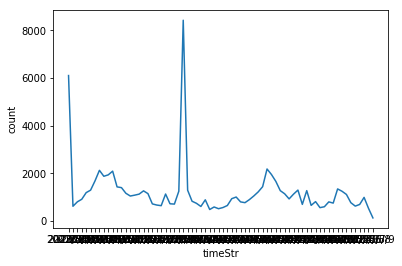

In [7]:
sns.lineplot(x="timeStr", y="count", data=date_com, markers=True)

In [8]:
user_comments = xue_distance.groupby(['user.userId'])
user_com = user_comments['user.userId'].agg(['count'])
user_com.reset_index(inplace=True)
user_com_last = user_com.sort_values('count', ascending=False)[0:20]
print(user_com_last)

      user.userId  count
60921  8455015649    129
38788  3963628262    114
57407  7890401962    103
60681  8430449562    100
47858  5114176147     95
21194  1930671410     93
51681   566213081     85
4040   1366699586     79
50107   541063310     79
54099   622107542     75
20904  1923260533     75
47797  5111163569     71
45421  4945096989     71
31535  3327610983     70
54275   625745696     67
61206  8473380483     66
14228  1681335566     66
21819  1956659800     60
24961  2131321920     56
61031  8460446466     53


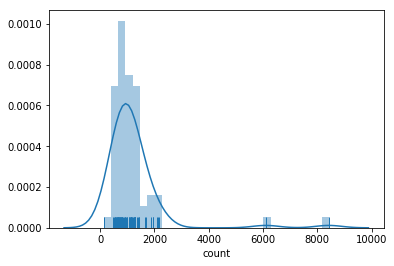

In [9]:
sns.distplot(date_com['count'], rug=True)

下面我们来生成词云，看看歌曲评论的关键词有哪些。

In [10]:
from wordcloud import WordCloud
import random
import jieba

ModuleNotFoundError: No module named '_typeshed'

In [ ]:
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h, s, l = random.choice([(188, 72, 53), (253, 63, 56), (12, 78, 69)])
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [ ]:
words = pd.read_csv('stopwords.txt', encoding='utf-8', sep='\t', names=['stopword'])

In [ ]:
text = ''
for line in xue_distance['content']:
    text += ' '.join(jieba.cut(str(line), cut_all=False))
stopwords = set('')
stopwords.update(words['stopword'])

In [ ]:
wc = WordCloud(
    background_color='white',
    max_words=2000,
    max_font_size=250,
    min_font_size=15,
    font_path = "msyh.ttc",
    color_func=random_color_func,
    prefer_horizontal=1,
    random_state=50,
    stopwords=stopwords
)
wc.generate(text)